In [1]:
from collections import Counter
import pickle
import numpy as np

directory = "C:\\Users\\mirtg\\Documents\\facultate\\an3\\MIRPR\\dataset\\WESAD\\WESAD\\S3\\S3_E4_Data\\"
data = pickle.load(open(directory + 'S3.pkl', 'rb'), encoding='latin1')

#get the unique labels
labels = Counter(data['label'])
print(labels.items())
print(data.keys())
print('chest signals: ', data['signal']['chest'].keys())
print('wrist signals: ', data['signal']['wrist'].keys())


dict_keys(['signal', 'label', 'subject'])
chest signals:  dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist signals:  dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])


In [58]:
acc_chest = data['signal']['chest']['EDA']
acc_wrist = data['signal']['wrist']['EDA']
print(acc_chest.shape, acc_wrist.shape)
print(len(acc_chest), len(acc_wrist))
#plot the data
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
#plt.plot(acc_chest[:24000], label='chest')
#plt.plot(acc_wrist[:24000], label='wrist')
#plt.legend()
#plt.show()

signals = { #data['signal']['chest']['ACC'], 
           'ecg': data['signal']['chest']['ECG'], 
           'eda': data['signal']['wrist']['EDA'], 
           #data['signal']['chest']['EMG'], 
           #data['signal']['chest']['Resp'],
           'temp' : data['signal']['wrist']['TEMP'], 
           'bvp': data['signal']['wrist']['BVP'], 
           'ibi': [],
           'hr': []
        }

# I should sincronize the signals, if I want to use the data, I see that the data is sampled at 700Hz
# labels and ecg are sampled at 700Hz
# eda, temp are sampled at 4Hz
# bvp is sampled at 64Hz
# how should I extract the heart rate and the interbeat interval from the data?

#read csv files
import csv
import heartpy as hp

with open(directory + 'HR.csv', 'r') as f:
    reader = csv.reader(f)
    signals['hr'] = list(reader)
    

with open(directory + 'IBI.csv', 'r') as f:
    reader = csv.reader(f)
    signals['ibi'] = list(reader)

for key in signals.keys():
    print(key, len(signals[key]))
signals['ecg'] = [signals['ecg'][i][0] for i in range(len(signals['ecg']))]
process = hp.process(signals['ecg'], sample_rate=700)
for x in process:
    print(x.keys())

(4545100, 1) (25972, 1)
4545100 25972
ecg 4545100
eda 25972
temp 25972
bvp 415552
ibi 1921
hr 7716
dict_keys(['hr', 'sample_rate', 'peaklist', 'ybeat', 'rolling_mean', 'RR_list', 'RR_indices', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor', 'nn20', 'nn50', 'poincare', 'breathing_signal', 'breathing_psd', 'breathing_frq'])
dict_keys(['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'sd1/sd2', 'breathingrate'])


[0.00000000e+00 1.95621980e-03 3.91243960e-03 ... 4.99996088e+02
 4.99998044e+02 5.00000000e+02]
4545100
1007.8971225857312


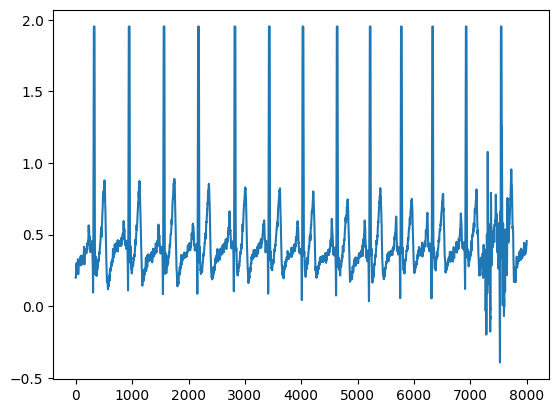

In [65]:
print(process[0]['breathing_frq'])
print(len(process[0]['hr']))
print(process[1]['ibi'])
plt.plot(process[0]['hr'][1000:9000], label='hr')
plt.show()